<a href="https://colab.research.google.com/github/SofiMich/CE/blob/main/T4_CE_Michaelian_RegSimb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Regresión simbólica con tabla creada en clase


In [ ]:
import numpy as np
import pandas as pd
import math
import random

In [ ]:
x = 1
r = random.randint(1,10)

def sum(x, y):
  return x + y

def times(x, y):
  return x * y

def dif(x, y):
  return x - y

def div(x, y):
  if y != 0:
   return x / y
  else:
    return x / (y + 0.0001) 

def cos(x):
  return np.cos(x)

def sin(x):
  return np.sin(x)

def log(x):
  if x > 0: 
    return np.log(x)
  else:
    return 0

def sqrt(x):
  if x >= 0:
    return np.sqrt(x)
  else:
    return 0

def pow(x):
  return np.power(x,2)


functions = {
  '+': sum,
  '*': times,
  '-': dif,
  '%': div,
  #'^': pow,
  'cos': cos,
  'sin': sin,
  'log': log,
  '√': sqrt
}

arguments = {
  '+': 2,
  '*': 2,
  '-': 2,
  '%': 2,
  #'^': 1,
  'cos': 1,
  'sin': 1,
  'log': 1,
  '√': 1
}

terminals = {
    'x': x,
    'r': r,
    '0': 0.0
}

f = {
  -5.0 : -3.1,
  -4.0 : -4.2,
  -3.0 : 2.2,
  -2.0 : -0.8,
  -1.0 : 6.0,
   0.0 : 2.5,
   1.0 : -1.0,
   2.0 : 5.0,
   3.0 : -2.0,
   4.0 : 10.0
}

f2 = {
  -5.0 : -5,
  -4.0 : -4,
  -3.0 : -3,
  -2.0 : -2,
  -1.0 : -1,
   0.0 : 0,
   1.0 : 1,
   2.0 : 2,
   3.0 : 3,
   4.0 : 4
}


In [ ]:
listaFunc = list(functions.keys())
listaTerms = list(terminals.keys())

In [ ]:

def seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms):
  if ((nNodos <= nMaxNodos) and (nArg > 0)):
    a = random.randint(1,10)

    if ((a <= 5) and (nFunc <= nMaxFunc)):
      #print('Seleccionando función')
      token = np.random.choice(listaFunc)
      nArg = nArg + arguments[token]
      nFunc = nFunc + 1
      
    else:
      #print('Seleccionando terminal')
      token = np.random.choice(listaTerms)
      if(token == 'r'):
        token = random.uniform(0, 10)

    nNodos = nNodos + 1
    nArg = nArg - 1
    individuo.append(token)
    #print(nNodos, token, nArg)

    if ((nNodos <= nMaxNodos) and (nArg > 0)):
      seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms)
    
  return individuo

In [ ]:
def crearIndividuo(nMaxNodos, listaFunc, listaTerms):
  individuo = []
  nMaxFunc = nMaxNodos/2 - 1
  nNodos = 0
  nFunc = 0
  nArg = 1
  indivuduo = seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms)
  l = len(individuo)
  n = nMaxNodos - len(individuo)
  ceros = ['0']*n
  individuo = individuo + ceros
  return individuo, l

In [ ]:
individuo = crearIndividuo(10, listaFunc, listaTerms)
print(individuo)

(['x', '0', '0', '0', '0', '0', '0', '0', '0', '0'], 1)


In [ ]:
r = random.uniform(0, 10)
print(r)

8.096970147039121


In [ ]:
def parse(tokens, terminals, functions):
  if (len(tokens)) > 0:
    token = tokens.pop(0)
    if token in functions:
        #print('Parse if in functions:')
        if arguments[token] == 1:
          return functions[token](parse(tokens, terminals, functions))
        elif arguments[token] == 2:
          return functions[token](parse(tokens, terminals, functions), parse(tokens, terminals, functions))
    elif (token == 'x' or token == '0'):
        return terminals[token]
    else:
        return token
  else:
    return 1

In [ ]:
individuo

(['x', '0', '0', '0', '0', '0', '0', '0', '0', '0'], 1)

In [ ]:
parse(individuo[0][0:4], terminals, functions)

1

In [ ]:
def crearPoblacion(nInd, nMaxNodos, listaFunc, listaTerms):
  pob = []
  l = []
  for i in range(nInd):
    individuo, l = crearIndividuo(nMaxNodos, listaFunc, listaTerms)
    pob.append([individuo, l, 0])
  return pob

In [ ]:
def evaluarIndividuo(individuo, objetivo, functions, terminals):
  #print('evaluando')
  error = 0
  for key in objetivo:
    y_expected = objetivo[key]
    x = key
    #print(individuo)
    l = individuo[1]
    #print(l)
    if l > 0:
      #print(individuo[0][0:l])
      tokens = individuo[0][0:l]
      #print(key)
      y = parse(tokens, terminals, functions)
    else:
      y = 0
    error = error + abs(y-y_expected)
  error = error / len(objetivo)
  individuo[-1] = error
  #print('ya lo evalué')
  #print(individuo)
  #print(error)
  return individuo, error

In [ ]:
def evaluarPoblacion(pob, objetivo, functions, terminals):
  #print('evaluar pob')
  x = np.zeros(len(pob))
  for i in range(len(pob)):
    pob[i], x[i] = evaluarIndividuo(pob[i], objetivo, functions, terminals)
  return pob, x

### Calcular Fitness

In [ ]:
def calcularFitness(pob):
  total = np.sum(pob, axis = 0)[-1]
  for i in range(len(pob)):
    pob[i][-1] = pob[i][-1] / (total + np.nextafter(0,1))
  return pob

### Calcular probabilidad de selección

In [ ]:
def calcularPS(x):
  total = np.sum(x, axis = 0)[-1]
  
  for i in x:
    if i[-1]/total >= 0:
        i[-1] = i[-1]/total
    else:
        print('Probabilidad negativa!!!')
        print(i)
        i[-1] = np.nextafter(0,1)
  return x

### Seleccionar individuos para el pool de cruza

In [ ]:
def seleccionarRuleta(pob):
  #print('seleccionarRuleta')
  pool = []
  pob = calcularFitness(pob)
  proba = np.zeros(len(pob))
  for i in range(len(pob)):
    proba[i] = pob[i][-1]
    
  for i in range(len(pob)):
    r = np.random.choice(range(len(pob)), p = proba)
    pool.append(pob[r][0:2])
  return pool

In [ ]:
def seleccionarTorneo(pob):
  #print('seleccionarTorneo')
  pool = []

  for i in range(len(pob)):
    j = random.choice(range(len(pob)))
    k = random.choice(range(len(pob)))
    if pob[j][-1] <= pob[k][-1]:
      pool.append(pob[j][0:2])
    else:
      pool.append(pob[k][0:2])
  return pool

### Cruza

In [ ]:
def cruzar(pool, pc):
  #print('cruzar')
  nuevaGen = []

  l = len(pool[0][0])

  for i in range(len(pool)//2):
    
    padre1 = pool[2*i][0]
    l1 = pool[2*i][1]

    padre2 = pool[2*i+1][0]
    l2 = pool[2*i+1][1]

    r = random.uniform(0,1)

    if r <= pc:
      
      n1 = random.randint(0,l1-1)
      n2 = random.randint(0,l2-1)
      
      f1 = n1+(l2-n2)
      f2 = n2+(l1-n1)

      if (f1 <= l) and (f2 <= l):
        #print('cruzando')

        ceros = ['0']*(l-f1)
        hijo1 = padre1[0:n1]+padre2[n2:l2]+ceros

        ceros = ['0']*(l-f2)
        hijo2 = padre2[0:n2]+padre1[n1:l1]+ceros

      else:
        hijo1 = padre1
        hijo2 = padre2
        f1 = l1
        f2 = l2
    
    else:
      hijo1 = padre1
      hijo2 = padre2
      f1 = l1
      f2 = l2

    #print(hijo1, hijo2)
    nuevaGen.append([hijo1, f1, 0])
    nuevaGen.append([hijo2, f2, 0])

  return nuevaGen

### Mutación

In [ ]:
def mutar(nuevaGen, listaFunc, listaTerms, pm = 1):
  #print('mutar')
  l = len(nuevaGen[0][0])
  #print(l)

  for i in range(len(nuevaGen)):
    prob = random.uniform(np.nextafter(0,1),1.0)
    if prob <= pm:
      l1 = nuevaGen[i][1]
      #print(l1)
      n = random.randint(0,l1-1)
      mutacion = crearIndividuo(l-n, listaFunc, listaTerms)
      #print(nuevaGen[i], mutacion, n)
      #ceros = ['0']*(n+)
      nuevaGen[i][0] = nuevaGen[i][0][0:n] + mutacion[0]
      nuevaGen[i][1] = n + mutacion[1]
      #print(nuevaGen[i])
  return nuevaGen

# Elitismo

In [ ]:
def elitismo1(pob, nuevaGen, mejor, objetivo, functions, terminals):
  #print('elitismo1')
  #print(mejor)
  retadores = nuevaGen
  retadores, y = evaluarPoblacion(retadores, objetivo, functions, terminals)
  indMax = np.where(y == np.max(y))[0][0]
  nuevaGen[indMax] = mejor
  #print(nuevaGen[indMax])
  return nuevaGen

In [ ]:
def elitismoT(pob, nuevaGen, mejor, objetivo, functions, terminals):
    #print('elitismoT')
    nInd = len(pob)
    torneo = pob + nuevaGen
    torneo, y = evaluarPoblacion(torneo, objetivo, functions, terminals)
    indMin = np.argpartition(y, nInd) 
    j = 0
    for k in range(nInd):
      nuevaGen[k] = (np.array(torneo, dtype=object)[indMin.astype(int)][j]).tolist()
      j = (j + 1)% nInd
    return nuevaGen

# Evolucionar

In [ ]:
def evolucionar(nInd, nMaxNodos, ngeneraciones, pc, pm, objetivo, functions, terminals, seleccionar, elitismo, nombre):
  mejor = []  
  promedio = np.zeros(ngeneraciones)

  listaFunc = list(functions.keys())
  #print(listaFunc)
  listaTerms = list(terminals.keys())

  pob = crearPoblacion(nInd, nMaxNodos, listaFunc, listaTerms)
  #print(pob)

  for i in range(ngeneraciones):

    #print(i)
    pob, x = evaluarPoblacion(pob, objetivo, functions, terminals)
    #print(pob)

    indMin = np.where(x == np.min(x))[0][0]
    
    #print(np.where(x == np.min(x))[0][0])
    mejor.append(pob[indMin]) #guardamos al individuo con el mejor desempeño
  
    promedio[i] = np.sum(x) / len(pob) #calculamos el promedio del desempeño de la población

    pool = seleccionar(pob)
    #print(pob)

    nuevaGen = cruzar(pool, pc)
    #print(nuevaGen)

    nuevaGen = mutar(nuevaGen, listaFunc, listaTerms, pm)
    #print(nuevaGen)

    #Elitismo:
    nuevaGen = elitismo(pob, nuevaGen, mejor[i], objetivo, functions, terminals)
    #print(nuevaGen)

    pob = nuevaGen

# Graficar
  import matplotlib.pyplot as plt

  plt.axes(xlabel='Generación', ylabel = 'Error')
  plt.title('Desempeño ' + str(nInd) + ' individuos en ' +str(ngeneraciones) + ' generaciones\n '+ nombre)

  mejores, y = evaluarPoblacion(mejor, objetivo, functions, terminals)
  plt.plot(promedio)
  plt.plot(y)
  #print(y)

  plt.legend(labels=["Promedio","Mejor individuo"])
  plt.show

  return mejores


In [ ]:
nGen = 10
nInd = 100
pc = 0.7
pm = 0.2
nMaxNodos = 5
objetivo = f2

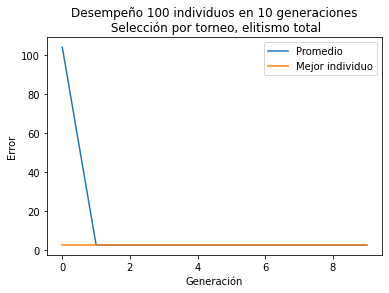

In [ ]:
mejores = evolucionar(nInd, nMaxNodos, nGen, pc, pm, f2, functions, terminals, seleccionarTorneo, elitismoT, 'Selección por torneo, elitismo total')

In [ ]:
print(mejores)

[[['*', '*', 9.19249465546894, '0', 'x'], 5, 2.5], [['cos', '%', 3.0751904362637106, 'x', '0'], 4, 2.4999999999999996], [['cos', '%', 3.0751904362637106, 'x', '0'], 4, 2.4999999999999996], [['cos', '%', 3.0751904362637106, 'x', '0'], 4, 2.4999999999999996], [['cos', '%', 3.0751904362637106, 'x', '0'], 4, 2.4999999999999996], [['cos', '%', 3.0751904362637106, 'x', '0'], 4, 2.4999999999999996], [['cos', 3.0751904362637106, '0', '0', '0'], 3, 2.4999999999999996], [['cos', 3.0751904362637106, 'x', '0', '0'], 3, 2.4999999999999996], [['cos', 3.0751904362637106, 'x', '0', '0'], 3, 2.4999999999999996], [['cos', 2.100875009002295, '0', '0', '0'], 2, 2.4999999999999996]]


In [ ]:
print(mejores[-1])

[['cos', 2.100875009002295, '0', '0', '0'], 2, 2.4999999999999996]


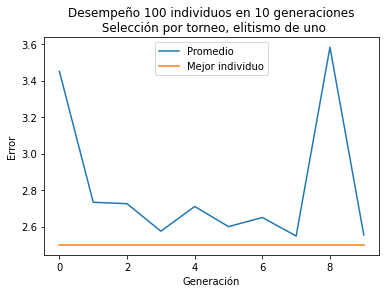

In [ ]:
mejores = evolucionar(nInd, nMaxNodos, nGen, pc, pm, f2, functions, terminals, seleccionarTorneo, elitismo1, 'Selección por torneo, elitismo de uno')

In [ ]:
mejores[-1]

[['sin', 3.161077998076186, '0', '0', '0'], 2, 2.4999999999999996]